In [334]:
import pandas as pd
import numpy as np
def identify_column(value):

    """
    Распределяет колонки используя данные алгоритмы. Используется в этой задаче потому что были сделаны сильные ошибки при скрэйпинге данных. Влияет на точность.
    """
    value_str = str(value)  
    if 'показать на карте' in value_str:
        return 'region'
    elif value_str in ['кирпичный', 'монолитный', 'панельный', 'иное']:
        return 'build_type'
    elif '〒' in value_str:
        return 'cost'
    elif value_str.isdigit() and len(value_str) == 4 and 1950 <= int(value_str) <= 2024:
        return 'date_built'
    elif ' из ' in value_str and len(value_str)<10:
        return 'floor'
    elif value_str in ['совмещенный', 'свежий ремонт', 'черновая отделка', 'нет']:
        return 'renovation_type'
    elif '.0' in value_str:
        return 'id'
    elif "м²" in value_str:
        return 'area'
    elif len(value_str) > 15:
        return 'desc'
    elif value_str in ['да', 'нет', 'раздельный', 'металлическая', 'полностью']:
        return 'extra'
    elif ' м ' in value_str:
        return 'extra'
    else:
        return 'name'  

df = pd.read_csv('asset_data.csv', names=['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6', 'column_7', 'column_8', 'column_9', 'column_10', 'column_11'])

expected_columns = ['region', 'build_type', 'name', 'date_built', 'floor', 'area', 'renovation_type', 'cost', 'desc', 'id', 'extra']

rows_list = []

for idx, row in df.iterrows():
    row_data = {col: None for col in expected_columns}  
    
    for value in row:
        col_type = identify_column(value)
        if row_data[col_type] is None:
            row_data[col_type] = value
    
    rows_list.append(row_data)

df = pd.DataFrame(rows_list)



In [335]:
df


,region,build_type,name,date_built,floor,area,renovation_type,cost,desc,id,extra
0,"Астана, Алматы р-нпоказать на карте",кирпичный,Жасыл-Астана НС,2019,9 из 10,43 м²,совмещенный,18300000〒,"кухня студия+спальня, дду",None,None
1,"Астана, Есильский р-нпоказать на карте",монолитный,Jetisu.Lepsi,2023,13 из 14,"64 м², Площадь кухни — 11 м²",None,33000000〒,None,None,None
2,"Астана, Есильский р-нпоказать на карте",кирпичный,ONYX,2023,12 из 12,"35 м², Площадь кухни — 10 м²",черновая отделка,13500000〒,✅Левый берег ✅3 м высота потолков ✅Красивый ...,None,None
3,"Астана, Есильский р-нпоказать на карте",кирпичный,Варшава,2021,8 из 10,84 м²,свежий ремонт,49900000〒,"Пластиковые окна, неугловая, кухня-студия, вст...",None,None
4,"Астана, Алматы р-нпоказать на карте",кирпичный,Sapsan,2024,2 из 12,44 м²,черновая отделка,16000000〒,🔥🔥🔥ГОРЯЧАЯ ЦЕНА! 💎Продаётся просторная 1 ко...,None,None
...,...,...,...,...,...,...,...,...,...,...,...
22976,"Астана, р-н Байконурпоказать на карте",монолитный,Сан сити,2007,7 из 14,"47.7 м², Площадь кухни — 9 м²",None,25000000〒,"не новый, но аккуратный ремонт",695745508.0,None
22977,"Астана, Алматы р-нпоказать на карте",кирпичный,Сатурн,2020,9 из 9,"33 м², Площадь кухни — 8.5 м²",свежий ремонт,15500000〒,None,"Пластиковые окна, неугловая. Полноценная одно...",None
22978,"Астана, Есильский р-нпоказать на карте",монолитный,Sat City,2022,2 из 12,"40 м², Площадь кухни — 10 м²",свежий ремонт,24000000〒,"Кухня-студия, тихий двор, встроенная кухня, но...",695792392.0,None
22979,"Астана, Нура р-нпоказать на карте",кирпичный,Manhattan,2019,9 из 10,54 м²,свежий ремонт,30990000〒,"Неугловая, улучшенная, комнаты изолированы, ку...",693493645.0,None


In [336]:
df['district'] = df['region'].str.extract(r'Астана, (.+?) р-н')

df

,region,build_type,name,date_built,floor,area,renovation_type,cost,desc,id,extra,district
0,"Астана, Алматы р-нпоказать на карте",кирпичный,Жасыл-Астана НС,2019,9 из 10,43 м²,совмещенный,18300000〒,"кухня студия+спальня, дду",None,None,Алматы
1,"Астана, Есильский р-нпоказать на карте",монолитный,Jetisu.Lepsi,2023,13 из 14,"64 м², Площадь кухни — 11 м²",None,33000000〒,None,None,None,Есильский
2,"Астана, Есильский р-нпоказать на карте",кирпичный,ONYX,2023,12 из 12,"35 м², Площадь кухни — 10 м²",черновая отделка,13500000〒,✅Левый берег ✅3 м высота потолков ✅Красивый ...,None,None,Есильский
3,"Астана, Есильский р-нпоказать на карте",кирпичный,Варшава,2021,8 из 10,84 м²,свежий ремонт,49900000〒,"Пластиковые окна, неугловая, кухня-студия, вст...",None,None,Есильский
4,"Астана, Алматы р-нпоказать на карте",кирпичный,Sapsan,2024,2 из 12,44 м²,черновая отделка,16000000〒,🔥🔥🔥ГОРЯЧАЯ ЦЕНА! 💎Продаётся просторная 1 ко...,None,None,Алматы
...,...,...,...,...,...,...,...,...,...,...,...,...
22976,"Астана, р-н Байконурпоказать на карте",монолитный,Сан сити,2007,7 из 14,"47.7 м², Площадь кухни — 9 м²",None,25000000〒,"не новый, но аккуратный ремонт",695745508.0,None,NaN
22977,"Астана, Алматы р-нпоказать на карте",кирпичный,Сатурн,2020,9 из 9,"33 м², Площадь кухни — 8.5 м²",свежий ремонт,15500000〒,None,"Пластиковые окна, неугловая. Полноценная одно...",None,Алматы
22978,"Астана, Есильский р-нпоказать на карте",монолитный,Sat City,2022,2 из 12,"40 м², Площадь кухни — 10 м²",свежий ремонт,24000000〒,"Кухня-студия, тихий двор, встроенная кухня, но...",695792392.0,None,Есильский
22979,"Астана, Нура р-нпоказать на карте",кирпичный,Manhattan,2019,9 из 10,54 м²,свежий ремонт,30990000〒,"Неугловая, улучшенная, комнаты изолированы, ку...",693493645.0,None,Нура


In [337]:
df['NaN_Count'] = df.isna().sum(axis=1)

max_nan_count = df['NaN_Count'].max()

df = df[df['NaN_Count'] != max_nan_count]

df = df.drop(columns=['NaN_Count'])

df

,region,build_type,name,date_built,floor,area,renovation_type,cost,desc,id,extra,district
0,"Астана, Алматы р-нпоказать на карте",кирпичный,Жасыл-Астана НС,2019,9 из 10,43 м²,совмещенный,18300000〒,"кухня студия+спальня, дду",None,None,Алматы
1,"Астана, Есильский р-нпоказать на карте",монолитный,Jetisu.Lepsi,2023,13 из 14,"64 м², Площадь кухни — 11 м²",None,33000000〒,None,None,None,Есильский
2,"Астана, Есильский р-нпоказать на карте",кирпичный,ONYX,2023,12 из 12,"35 м², Площадь кухни — 10 м²",черновая отделка,13500000〒,✅Левый берег ✅3 м высота потолков ✅Красивый ...,None,None,Есильский
3,"Астана, Есильский р-нпоказать на карте",кирпичный,Варшава,2021,8 из 10,84 м²,свежий ремонт,49900000〒,"Пластиковые окна, неугловая, кухня-студия, вст...",None,None,Есильский
4,"Астана, Алматы р-нпоказать на карте",кирпичный,Sapsan,2024,2 из 12,44 м²,черновая отделка,16000000〒,🔥🔥🔥ГОРЯЧАЯ ЦЕНА! 💎Продаётся просторная 1 ко...,None,None,Алматы
...,...,...,...,...,...,...,...,...,...,...,...,...
22976,"Астана, р-н Байконурпоказать на карте",монолитный,Сан сити,2007,7 из 14,"47.7 м², Площадь кухни — 9 м²",None,25000000〒,"не новый, но аккуратный ремонт",695745508.0,None,NaN
22977,"Астана, Алматы р-нпоказать на карте",кирпичный,Сатурн,2020,9 из 9,"33 м², Площадь кухни — 8.5 м²",свежий ремонт,15500000〒,None,"Пластиковые окна, неугловая. Полноценная одно...",None,Алматы
22978,"Астана, Есильский р-нпоказать на карте",монолитный,Sat City,2022,2 из 12,"40 м², Площадь кухни — 10 м²",свежий ремонт,24000000〒,"Кухня-студия, тихий двор, встроенная кухня, но...",695792392.0,None,Есильский
22979,"Астана, Нура р-нпоказать на карте",кирпичный,Manhattan,2019,9 из 10,54 м²,свежий ремонт,30990000〒,"Неугловая, улучшенная, комнаты изолированы, ку...",693493645.0,None,Нура


In [338]:
import pandas as pd
import numpy as np

def split_floor(row):
    if isinstance(row['floor'], str) and 'из' in row['floor']:
        floor_data = row['floor'].split(' из ')
        row['current_floor'] = floor_data[0].strip() if len(floor_data) > 0 else np.nan
        row['total_floors'] = floor_data[1].strip() if len(floor_data) > 1 else np.nan
    else:
        row['current_floor'] = row['floor']
        row['total_floors'] = np.nan
    return row


df = df.apply(split_floor, axis=1)

df = df.drop(columns=['floor'])

df

,region,build_type,name,date_built,area,renovation_type,cost,desc,id,extra,district,current_floor,total_floors
0,"Астана, Алматы р-нпоказать на карте",кирпичный,Жасыл-Астана НС,2019,43 м²,совмещенный,18300000〒,"кухня студия+спальня, дду",None,None,Алматы,9,10
1,"Астана, Есильский р-нпоказать на карте",монолитный,Jetisu.Lepsi,2023,"64 м², Площадь кухни — 11 м²",None,33000000〒,None,None,None,Есильский,13,14
2,"Астана, Есильский р-нпоказать на карте",кирпичный,ONYX,2023,"35 м², Площадь кухни — 10 м²",черновая отделка,13500000〒,✅Левый берег ✅3 м высота потолков ✅Красивый ...,None,None,Есильский,12,12
3,"Астана, Есильский р-нпоказать на карте",кирпичный,Варшава,2021,84 м²,свежий ремонт,49900000〒,"Пластиковые окна, неугловая, кухня-студия, вст...",None,None,Есильский,8,10
4,"Астана, Алматы р-нпоказать на карте",кирпичный,Sapsan,2024,44 м²,черновая отделка,16000000〒,🔥🔥🔥ГОРЯЧАЯ ЦЕНА! 💎Продаётся просторная 1 ко...,None,None,Алматы,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22976,"Астана, р-н Байконурпоказать на карте",монолитный,Сан сити,2007,"47.7 м², Площадь кухни — 9 м²",None,25000000〒,"не новый, но аккуратный ремонт",695745508.0,None,NaN,7,14
22977,"Астана, Алматы р-нпоказать на карте",кирпичный,Сатурн,2020,"33 м², Площадь кухни — 8.5 м²",свежий ремонт,15500000〒,None,"Пластиковые окна, неугловая. Полноценная одно...",None,Алматы,9,9
22978,"Астана, Есильский р-нпоказать на карте",монолитный,Sat City,2022,"40 м², Площадь кухни — 10 м²",свежий ремонт,24000000〒,"Кухня-студия, тихий двор, встроенная кухня, но...",695792392.0,None,Есильский,2,12
22979,"Астана, Нура р-нпоказать на карте",кирпичный,Manhattan,2019,54 м²,свежий ремонт,30990000〒,"Неугловая, улучшенная, комнаты изолированы, ку...",693493645.0,None,Нура,9,10


In [339]:
def split_area(area_str):
    if pd.isna(area_str):
        return pd.Series([np.nan, np.nan])
    
    total_area = np.nan
    kitchen_area = np.nan
    
    parts = area_str.split(',')
    
    if len(parts) > 0:
        total_area = parts[0].strip()
    
    for part in parts:
        if 'Площадь кухни' in part:
            kitchen_area = part.split('—')[-1].strip()
    
    return pd.Series([total_area, kitchen_area])

df[['total_area', 'kitchen_area']] = df['area'].apply(split_area)

df = df.drop(columns=['area'])

df

,region,build_type,name,date_built,renovation_type,cost,desc,id,extra,district,current_floor,total_floors,total_area,kitchen_area
0,"Астана, Алматы р-нпоказать на карте",кирпичный,Жасыл-Астана НС,2019,совмещенный,18300000〒,"кухня студия+спальня, дду",None,None,Алматы,9,10,43 м²,NaN
1,"Астана, Есильский р-нпоказать на карте",монолитный,Jetisu.Lepsi,2023,None,33000000〒,None,None,None,Есильский,13,14,64 м²,11 м²
2,"Астана, Есильский р-нпоказать на карте",кирпичный,ONYX,2023,черновая отделка,13500000〒,✅Левый берег ✅3 м высота потолков ✅Красивый ...,None,None,Есильский,12,12,35 м²,10 м²
3,"Астана, Есильский р-нпоказать на карте",кирпичный,Варшава,2021,свежий ремонт,49900000〒,"Пластиковые окна, неугловая, кухня-студия, вст...",None,None,Есильский,8,10,84 м²,NaN
4,"Астана, Алматы р-нпоказать на карте",кирпичный,Sapsan,2024,черновая отделка,16000000〒,🔥🔥🔥ГОРЯЧАЯ ЦЕНА! 💎Продаётся просторная 1 ко...,None,None,Алматы,2,12,44 м²,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22976,"Астана, р-н Байконурпоказать на карте",монолитный,Сан сити,2007,None,25000000〒,"не новый, но аккуратный ремонт",695745508.0,None,NaN,7,14,47.7 м²,9 м²
22977,"Астана, Алматы р-нпоказать на карте",кирпичный,Сатурн,2020,свежий ремонт,15500000〒,None,"Пластиковые окна, неугловая. Полноценная одно...",None,Алматы,9,9,33 м²,8.5 м²
22978,"Астана, Есильский р-нпоказать на карте",монолитный,Sat City,2022,свежий ремонт,24000000〒,"Кухня-студия, тихий двор, встроенная кухня, но...",695792392.0,None,Есильский,2,12,40 м²,10 м²
22979,"Астана, Нура р-нпоказать на карте",кирпичный,Manhattan,2019,свежий ремонт,30990000〒,"Неугловая, улучшенная, комнаты изолированы, ку...",693493645.0,None,Нура,9,10,54 м²,NaN


In [340]:
def convert_area(area_str):
    if pd.isna(area_str):
        return np.nan
    return pd.to_numeric(area_str.replace('м²', '').strip())

df['total_area'] = df['total_area'].apply(convert_area)
df['kitchen_area'] = df['kitchen_area'].apply(convert_area)
df['current_floor'] = df['current_floor'].apply(pd.to_numeric)
df['total_floors'] = df['total_floors'].apply(pd.to_numeric)
df['cost'] = df['cost'].str.extract(r'(\d+)').astype(float)
df

,region,build_type,name,date_built,renovation_type,cost,desc,id,extra,district,current_floor,total_floors,total_area,kitchen_area
0,"Астана, Алматы р-нпоказать на карте",кирпичный,Жасыл-Астана НС,2019,совмещенный,18300000.0,"кухня студия+спальня, дду",None,None,Алматы,9.0,10.0,43.0,NaN
1,"Астана, Есильский р-нпоказать на карте",монолитный,Jetisu.Lepsi,2023,None,33000000.0,None,None,None,Есильский,13.0,14.0,64.0,11.0
2,"Астана, Есильский р-нпоказать на карте",кирпичный,ONYX,2023,черновая отделка,13500000.0,✅Левый берег ✅3 м высота потолков ✅Красивый ...,None,None,Есильский,12.0,12.0,35.0,10.0
3,"Астана, Есильский р-нпоказать на карте",кирпичный,Варшава,2021,свежий ремонт,49900000.0,"Пластиковые окна, неугловая, кухня-студия, вст...",None,None,Есильский,8.0,10.0,84.0,NaN
4,"Астана, Алматы р-нпоказать на карте",кирпичный,Sapsan,2024,черновая отделка,16000000.0,🔥🔥🔥ГОРЯЧАЯ ЦЕНА! 💎Продаётся просторная 1 ко...,None,None,Алматы,2.0,12.0,44.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22976,"Астана, р-н Байконурпоказать на карте",монолитный,Сан сити,2007,None,25000000.0,"не новый, но аккуратный ремонт",695745508.0,None,NaN,7.0,14.0,47.7,9.0
22977,"Астана, Алматы р-нпоказать на карте",кирпичный,Сатурн,2020,свежий ремонт,15500000.0,None,"Пластиковые окна, неугловая. Полноценная одно...",None,Алматы,9.0,9.0,33.0,8.5
22978,"Астана, Есильский р-нпоказать на карте",монолитный,Sat City,2022,свежий ремонт,24000000.0,"Кухня-студия, тихий двор, встроенная кухня, но...",695792392.0,None,Есильский,2.0,12.0,40.0,10.0
22979,"Астана, Нура р-нпоказать на карте",кирпичный,Manhattan,2019,свежий ремонт,30990000.0,"Неугловая, улучшенная, комнаты изолированы, ку...",693493645.0,None,Нура,9.0,10.0,54.0,NaN


In [341]:
df = df.drop(columns=['region'])


df = pd.get_dummies(df, columns=['build_type', 'renovation_type', 'district'], drop_first=True)


df


,name,date_built,cost,desc,id,extra,current_floor,total_floors,total_area,kitchen_area,build_type_кирпичный,build_type_монолитный,build_type_панельный,renovation_type_свежий ремонт,renovation_type_совмещенный,renovation_type_черновая отделка,district_Есильский,district_Нура,district_Сарыарка
0,Жасыл-Астана НС,2019,18300000.0,"кухня студия+спальня, дду",None,None,9.0,10.0,43.0,NaN,True,False,False,False,True,False,False,False,False
1,Jetisu.Lepsi,2023,33000000.0,None,None,None,13.0,14.0,64.0,11.0,False,True,False,False,False,False,True,False,False
2,ONYX,2023,13500000.0,✅Левый берег ✅3 м высота потолков ✅Красивый ...,None,None,12.0,12.0,35.0,10.0,True,False,False,False,False,True,True,False,False
3,Варшава,2021,49900000.0,"Пластиковые окна, неугловая, кухня-студия, вст...",None,None,8.0,10.0,84.0,NaN,True,False,False,True,False,False,True,False,False
4,Sapsan,2024,16000000.0,🔥🔥🔥ГОРЯЧАЯ ЦЕНА! 💎Продаётся просторная 1 ко...,None,None,2.0,12.0,44.0,NaN,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22976,Сан сити,2007,25000000.0,"не новый, но аккуратный ремонт",695745508.0,None,7.0,14.0,47.7,9.0,False,True,False,False,False,False,False,False,False
22977,Сатурн,2020,15500000.0,None,"Пластиковые окна, неугловая. Полноценная одно...",None,9.0,9.0,33.0,8.5,True,False,False,True,False,False,False,False,False
22978,Sat City,2022,24000000.0,"Кухня-студия, тихий двор, встроенная кухня, но...",695792392.0,None,2.0,12.0,40.0,10.0,False,True,False,True,False,False,True,False,False
22979,Manhattan,2019,30990000.0,"Неугловая, улучшенная, комнаты изолированы, ку...",693493645.0,None,9.0,10.0,54.0,NaN,True,False,False,True,False,False,False,True,False


In [342]:
import pandas as pd
from collections import Counter
import re
import emoji

df['Word Count'] = df['desc'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

all_emojis = emoji.EMOJI_DATA.keys()

special_symbols = list(all_emojis)

pattern = '|'.join(map(re.escape, special_symbols))
df['Special Symbol Count'] = df['desc'].apply(lambda x: len(re.findall(pattern, str(x))) if pd.notna(x) else 0)

df['desc'] = df['desc'].fillna('')
all_words = ' '.join(df['desc']).lower().split()
word_counts = Counter(all_words)

word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word/Phrase', 'Count'])
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

print("Word Counts in 'desc':\n", df[['desc', 'Word Count', 'Special Symbol Count']])
print("\nMost Common Words/Phrases:\n", word_counts_df.head(10))

word_counts_df.head(50)

Word Counts in 'desc':
                                                     desc  Word Count  \
0                              кухня студия+спальня, дду           3   
1                                                                  0   
2      ✅Левый берег  ✅3 м высота потолков  ✅Красивый ...          25   
3      Пластиковые окна, неугловая, кухня-студия, вст...          61   
4      🔥🔥🔥ГОРЯЧАЯ ЦЕНА!    💎Продаётся просторная 1 ко...          91   
...                                                  ...         ...   
22976                     не новый, но аккуратный ремонт           5   
22977                                                              0   
22978  Кухня-студия, тихий двор, встроенная кухня, но...          86   
22979  Неугловая, улучшенная, комнаты изолированы, ку...         108   
22980  Пластиковые окна, улучшенная, комнаты изолиров...         151   

       Special Symbol Count  
0                         0  
1                         0  
2                    

,Word/Phrase,Count
26,в,36880
18,и,28395
21,на,15814
257,с,13861
82,квартира,12788
240,не,8660
35,тихий,7908
28,пластиковые,7646
528,-,7628
29,"окна,",7312


In [343]:
df_descful = df

df_descful.dropna(subset=['desc'], inplace=True)


In [344]:
df = df.drop(columns=['desc'])
df = df.drop(columns=['id'])
df = df.drop(columns=['name'])
df = df.drop(columns=['extra'])

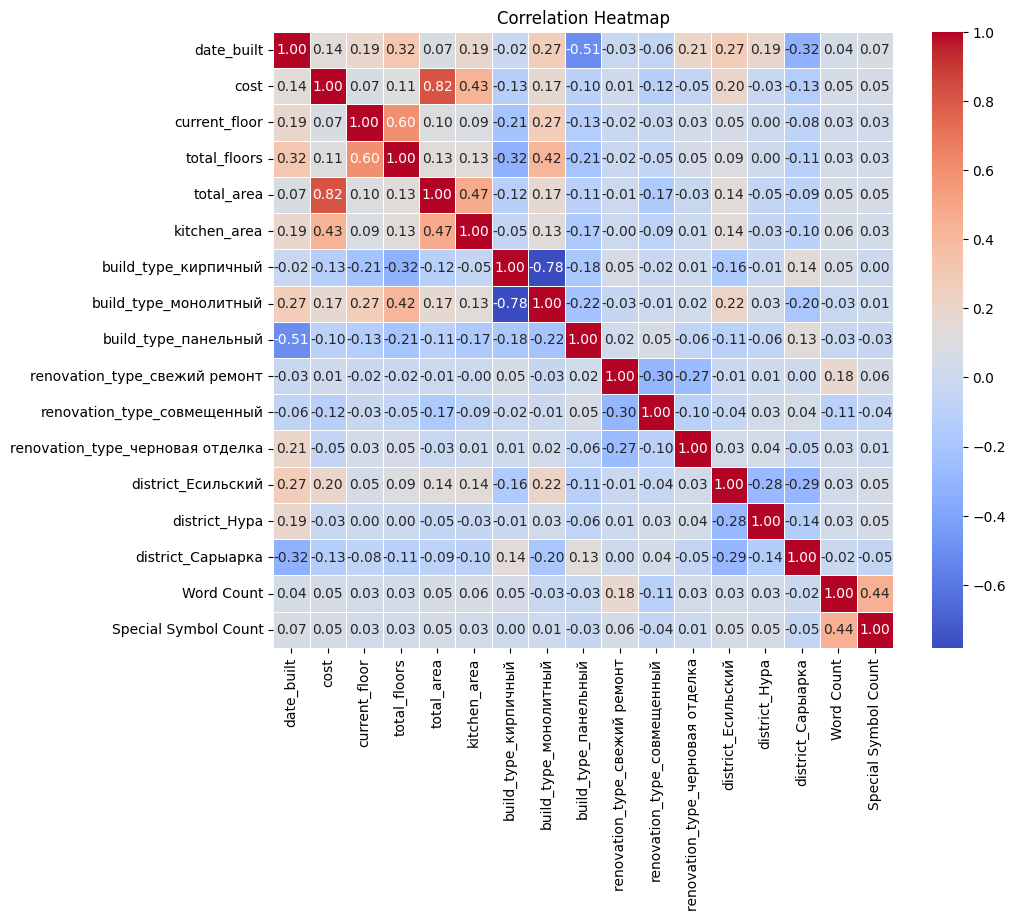

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [346]:
df_descful = df_descful.drop(columns=['desc'])
df_descful = df_descful.drop(columns=['id'])
df_descful = df_descful.drop(columns=['name'])
df_descful = df_descful.drop(columns=['extra'])



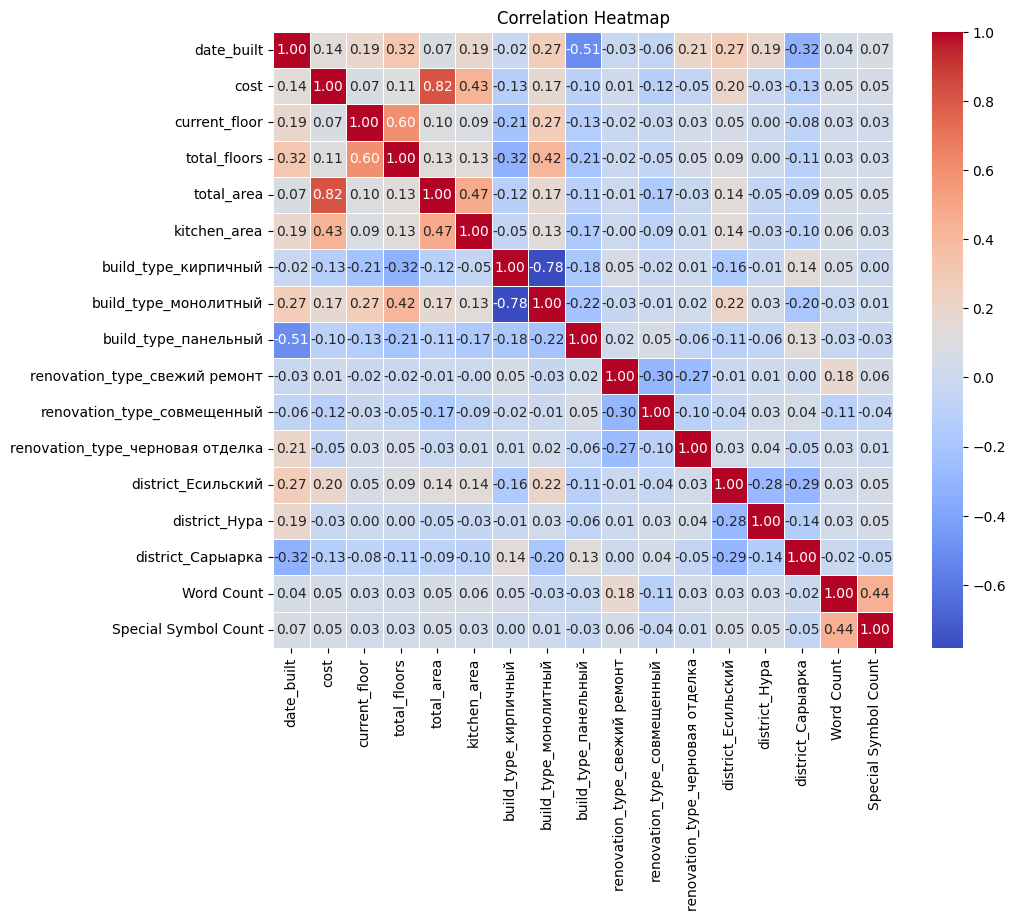

In [347]:
corr_matrix = df_descful.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [348]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

X = df.drop('cost', axis=1)
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [349]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Initialize the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 245450564575413.38


In [350]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Absolute Error: 4982082.739195517
R-squared: 0.7930812572560977


In [351]:
import joblib

joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [354]:
data = {
    'name': ['Жасыл-Астана НС'],
    'date_built': [2002],
    'desc': ['кухня студия+спальня, дду'],
    'id': [None],
    'extra': [None],
    'current_floor': [9.0],
    'total_floors': [20.0],
    'total_area': [150.0],
    'kitchen_area': [20.0],
    'build_type_кирпичный': [False],
    'build_type_монолитный': [True],
    'build_type_панельный': [False],
    'renovation_type_свежий ремонт': [False],
    'renovation_type_совмещенный': [False],
    'renovation_type_черновая отделка': [True],
    'district_Есильский': [True],
    'district_Нура': [False],
    'district_Сарыарка': [False],
    'Word Count': [30],
    'Special Symbol Count': [10]
}

df_prediction = pd.DataFrame(data)

df_prediction = df_prediction.drop(columns=['name', 'desc', 'id', 'extra'])

predicted_cost = model.predict(df_prediction)

df_prediction_scaled = scaler.transform(df_prediction)
predicted_cost = model.predict(df_prediction_scaled)
print("Predicted Cost:", predicted_cost[0])


Predicted Cost: 77372649.98
               cost  current_floor  total_floors    total_area  kitchen_area  \
count  2.284000e+04   22840.000000  22840.000000  22840.000000  22840.000000   
mean   3.673042e+07       6.473184     11.188351     68.330891     12.297644   
std    3.644992e+07       4.045269      4.834258     38.577702      3.417272   
min    2.350000e+06       1.000000      1.000000      8.100000      1.000000   
25%    2.000000e+07       3.750000      9.000000     42.200000     12.200000   
50%    2.750000e+07       6.000000     10.000000     60.000000     12.297644   
75%    3.990000e+07       8.000000     13.000000     82.000000     12.297644   
max    1.500000e+09      42.000000     48.000000    773.300000    165.000000   

         Word Count  Special Symbol Count  
count  22840.000000          22840.000000  
mean      49.012303              2.064448  
std       49.051266              5.603447  
min        0.000000              0.000000  
25%        6.000000            

c:\Users\user\Desktop\study\EDU_PRAC\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,date_built,current_floor,total_floors,total_area,kitchen_area,build_type_кирпичный,build_type_монолитный,build_type_панельный,renovation_type_свежий ремонт,renovation_type_совмещенный,renovation_type_черновая отделка,district_Есильский,district_Нура,district_Сарыарка,Word Count,Special Symbol Count
0,2002,9.0,20.0,150.0,20.0,False,True,False,False,False,True,True,False,False,30,10
